# Describing Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\nbeac\OneDrive\Documents\GitHub\Describing Distributions\Data\Medical Dataset.csv")
pd.set_option('display.max_columns', None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


* The features to analyze: 
     * VitD_levels
     * Doc_visits
     * TotalCharge



# For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
    * Add a line for the mean (red)
    *Add a line for the median (green)
    * Add a line for for +1 std from the mean (black)
    * Add a line for the - 1 std from the mean (black)
    * Highlight the range between +1 and =1 std (yellow)

In [22]:
analyzed_columns = df[['VitD_levels', 'Doc_visits', 'TotalCharge']]

analyzed_columns.info()
print('\n')
analyzed_columns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   VitD_levels  1000 non-null   float64
 1   Doc_visits   1000 non-null   int64  
 2   TotalCharge  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB




,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


## VitD_levels (Continuous Distribution)

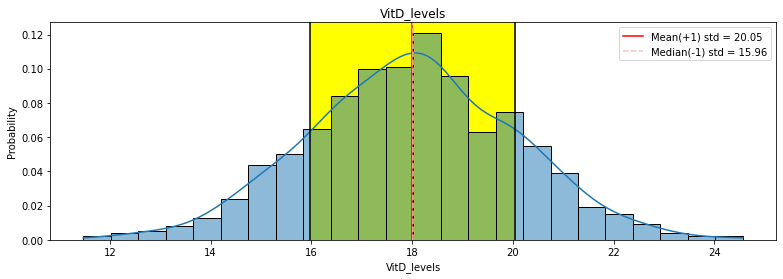

In [49]:
col = 'VitD_levels'
feature = df[col]

mean = feature.mean()
median = feature.median()

std = feature.std()
plus_one_std = mean + std
minus_one_std = median - std

fig,ax = plt.subplots(figsize=(13,4))
sns.histplot(feature, ax=ax, stat='probability',kde=True)

ax.axvline(mean, color='red', label=f'Mean(+1) std = {plus_one_std:,.2f}')
ax.axvline(plus_one_std, color='black')

# I'm going to replace the color green with pink that way it can be eaiser to see. 
ax.axvline(median, ls='--', color='pink', label=f'Median(-1) std = {minus_one_std:,.2f}')
ax.axvline(minus_one_std,color='black')

ax.axvspan(plus_one_std, minus_one_std, color='yellow', zorder=0)
ax.set_title(f"{col}")
ax.legend();

* The above appears to be normal distribution which means there is no skew.
* Values cluster in the middle which means we have a Mesokurtic Kurtosis

In [29]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

## Doc_visits (Discrete Distribution)

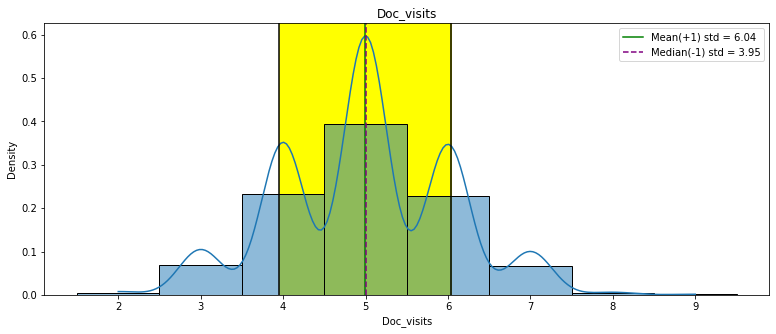

In [53]:
col = 'Doc_visits'
feature = df['Doc_visits']

mean = feature.mean()
median = feature.median()

std = feature.std()
plus_one_std = mean + std
minus_one_std = median - std

fig,ax = plt.subplots(figsize=(13,5))
sns.histplot(feature, ax=ax, discrete=True, stat='density',kde=True)

ax.axvline(mean, color='green', label=f'Mean(+1) std = {plus_one_std:,.2f}')
ax.axvline(plus_one_std, color='black')

ax.axvline(median, ls='--', color='purple', label=f'Median(-1) std = {minus_one_std:,.2f}')
ax.axvline(minus_one_std,color='black')

ax.axvspan(plus_one_std, minus_one_std, color='yellow', zorder=0)

ax.set_title(f"{col}")
ax.legend();

* The above is a Leptokurtic Kurtosis since the values cluster at the 'peak' of the distribution. 
* Positive Distrbution because of the pointynes and the skew showing that the median is smaller than the mean.

In [56]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

## TotalCharge (Continuous Distribution)

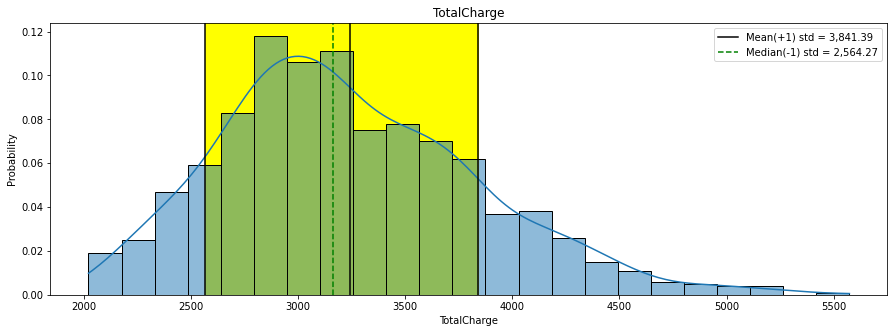

In [58]:
total_col = 'TotalCharge'
feature = df[total_col]

mean = feature.mean()
median = feature.median()

std = feature.std()
plus_one_std = mean + std
minus_one_std = median - std

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(feature, ax=ax, stat='probability',kde=True)

ax.axvline(mean, color='black', label=f'Mean(+1) std = {plus_one_std:,.2f}')
ax.axvline(plus_one_std, color='black')

ax.axvline(median, ls='--', color='green', label=f'Median(-1) std = {minus_one_std:,.2f}')
ax.axvline(minus_one_std,color='black')


ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)

ax.set_title(f"{total_col}")
ax.legend();

* Leptokurtic Kurtosis with the skew heading positive since the median is smaller than the mean and the right

In [59]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384